In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('data.xlsx')

# Define the features
features = [
    'Hydrogen Weight Percent',
    'Temperature',
    'Pressure',
    'HOF',
    'mean Atomic Weight',
    'mean Covalent Radius',
    'mean Electronegativity'
]

# Extract the feature values from the DataFrame
data = df[features].values

In [ ]:
# Standardize the features
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Define the GMM model
n_components = 3  # Specify the number of components/clusters
gmm = GaussianMixture(n_components=n_components, covariance_type='full')

# Fit the model to the data
gmm.fit(data)

# Obtain the cluster labels
labels = gmm.predict(data)

# Find the cluster with the highest average Hydrogen weight percent
unique_labels = np.unique(labels)
max_hydrogen_cluster = None
max_hydrogen_avg = -1

for label in unique_labels:
    hydrogen_avg = df.loc[labels == label, 'Hydrogen Weight Percent'].mean()
    if hydrogen_avg > max_hydrogen_avg:
        max_hydrogen_cluster = label
        max_hydrogen_avg = hydrogen_avg


<ipython-input-30-693b8c1d8193>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], c=cluster_colors, cmap='viridis')


Data point 0: Cluster 2
Data point 1: Cluster 0
Data point 2: Cluster 0
Data point 3: Cluster 2
Data point 4: Cluster 1
Data point 5: Cluster 1
Data point 6: Cluster 2
Data point 7: Cluster 1
Data point 8: Cluster 1
Data point 9: Cluster 1
Data point 10: Cluster 1
Data point 11: Cluster 1
Data point 12: Cluster 1
Data point 13: Cluster 1
Data point 14: Cluster 1
Data point 15: Cluster 2
Data point 16: Cluster 2
Data point 17: Cluster 2
Data point 18: Cluster 2
Data point 19: Cluster 2
Data point 20: Cluster 2
Data point 21: Cluster 2
Data point 22: Cluster 2
Data point 23: Cluster 2
Data point 24: Cluster 1
Data point 25: Cluster 2
Data point 26: Cluster 1
Data point 27: Cluster 1
Data point 28: Cluster 1
Data point 29: Cluster 1
Data point 30: Cluster 1
Data point 31: Cluster 1
Data point 32: Cluster 1
Data point 33: Cluster 1
Data point 34: Cluster 1
Data point 35: Cluster 1
Data point 36: Cluster 1
Data point 37: Cluster 1
Data point 38: Cluster 1
Data point 39: Cluster 1
Data point

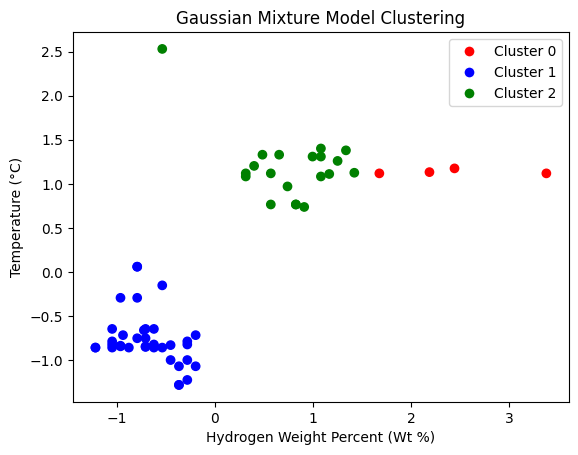

In [ ]:
# Assign unique colors to each cluster label
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta']
cluster_colors = [colors[label % len(colors)] for label in labels]

# Plot the clusters
plt.scatter(data[:, 0], data[:, 1], c=cluster_colors, cmap='viridis')
plt.xlabel('Hydrogen Weight Percent (Wt %)')
plt.ylabel('Temperature (°C)')
plt.title('Gaussian Mixture Model Clustering')

# Create a legend indicating the correspondence between colors and clusters
unique_labels = sorted(unique_labels)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(label),
                              markerfacecolor=color, markersize=8) for label, color in zip(unique_labels, colors)]
plt.legend(handles=legend_elements)

# Print the cluster labels for each data point
for i, label in enumerate(labels):
    print("Data point {}: Cluster {}".format(i, label))

plt.show()

In [ ]:
# Print the cluster with the highest average Hydrogen weight percent
if max_hydrogen_cluster is not None:
    print(f"Cluster with highest average Hydrogen weight percent: {max_hydrogen_cluster}")
else:
    print("No clusters found.")

Cluster with highest average Hydrogen weight percent: 0


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
# Performance Metrics
# Silhouette Score
silhouette = metrics.silhouette_score(data, labels)

# Calinski-Harabasz Index
ch_index = metrics.calinski_harabasz_score(data, labels)

# Davies-Bouldin Index
db_index = metrics.davies_bouldin_score(data, labels)

# Print the performance metrics
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", ch_index)
print("Davies-Bouldin Index:", db_index)

Silhouette Score: 0.503303924721087
Calinski-Harabasz Index: 46.32130192061218
Davies-Bouldin Index: 0.6607943052108941
